<h2><b><font color="blue">Logistic Regression</font></b></h2>
<p style="text-align: justify;">Logistic regression, despite its name, is a classification model rather than regression model. Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes. It is an extensively employed algorithm for classification in industry. The logistic regression model, like the Adaline and perceptron, is a statistical method for binary classification that can be generalized to multiclass classification. Scikit-learn has a highly optimized version of logistic regression implementation, which supports multiclass classification task</p>
<p><b>Characteristic Equation <font color="red">y = 1 / 1 + e<sup> - (m<sub>1</sub>x<sub>1</sub> + m<sub>2</sub>x<sub>2</sub> + ... + m<sub>n</sub>x<sub>n</sub> + c)</sup></font></b></p>
<p>Where, m<sub>1</sub>, m<sub>2</sub>, ..., m<sub>n</sub> are the coefficients<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;c is intercept<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub> are independent variables<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;y is dependent variable<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;e is Euler's number</p>

<h3>Step 1: Data Collection</h3>

In [1]:
import pandas as pd
df = pd.read_csv('datasets/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<h3>Step 2: Data Preprocessing</h3>

In [2]:
# check whether any null value presents in the dataset or not
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [3]:
# use label encoder to put numeric label to the gender labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801
...,...,...,...
9995,0,66.172652,136.777454
9996,0,67.067155,170.867906
9997,0,63.867992,128.475319
9998,0,69.034243,163.852461


<h3>Step 3: Feature Selection</h3>

In [4]:
y = df.iloc[:, 0]
X = df.iloc[:, [1, 2]]
print(X, y, sep='\n\n')

         Height      Weight
0     73.847017  241.893563
1     68.781904  162.310473
2     74.110105  212.740856
3     71.730978  220.042470
4     69.881796  206.349801
...         ...         ...
9995  66.172652  136.777454
9996  67.067155  170.867906
9997  63.867992  128.475319
9998  69.034243  163.852461
9999  61.944246  113.649103

[10000 rows x 2 columns]

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Gender, Length: 10000, dtype: int32


<h3>Step 4: Model Training and Testing</h3>

In [5]:
# split your dataset into the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
# train your model using the training dataset and check the score of the model and other parameters
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [7]:
# generate classification report to see the detailed parameters of your logistic regression model
from sklearn.metrics import classification_report
y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1478
           1       0.92      0.92      0.92      1522

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



<AxesSubplot:title={'center':'Confusion Matrix'}>

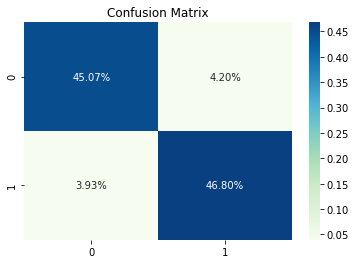

In [8]:
# generate confusion matrix to check the true positive and true negative rate
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.title("Confusion Matrix")
sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred)), annot=True, fmt='.2%', cmap='GnBu')

<h3>Step 5: Model Evaluation</h3>

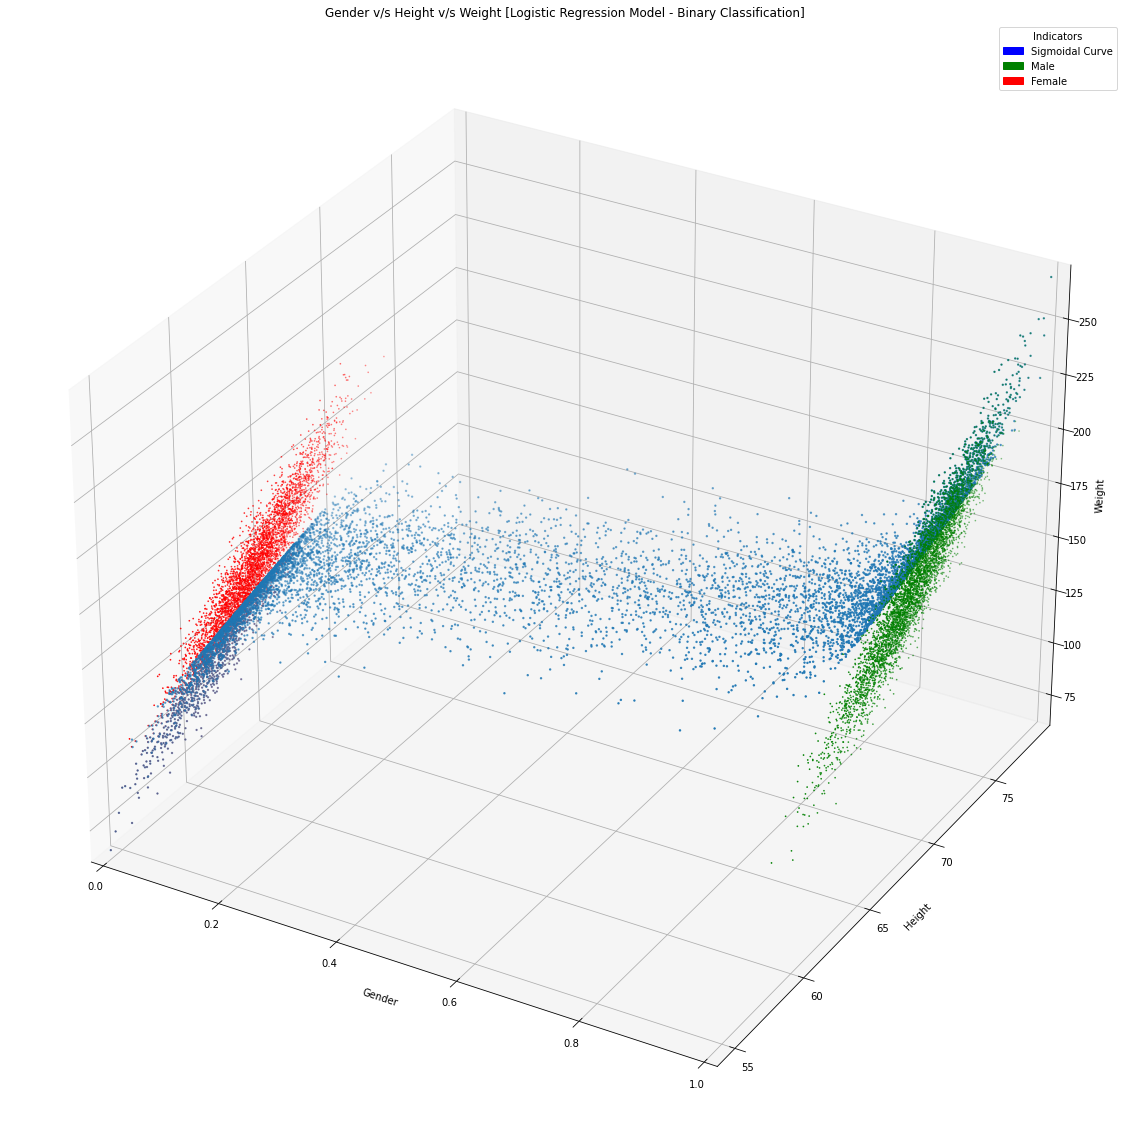

In [9]:
# plot data points and the sigmoidal curve set by the logistic regression model
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (16, 16)
ax = plt.axes(projection='3d')
df_male = df[df["Gender"] == 1]
df_female = df[df["Gender"] == 0]
ax.scatter3D(df_male.iloc[:, 0], df_male.iloc[:, 1], df_male.iloc[:, 2], s=0.5, c="Green")
ax.scatter3D(df_female.iloc[:, 0], df_female.iloc[:, 1], df_female.iloc[:, 2], s=0.5, c="Red")
x1 = np.array(df.iloc[:, 1])
x2 = np.array(df.iloc[:, 2])
c = [(lg.intercept_ + lg.coef_[0][0] * x1[i] + lg.coef_[0][1] * x2[i]) for i in range(len(x1))]
y = [1/(1 + np.exp(-c[i][0])) for i in range(len(c))]
ax.scatter3D(y, x1, x2, s=2)
plt.title("Gender v/s Height v/s Weight [Logistic Regression Model - Binary Classification]")
ax.set_xlabel("Gender")
ax.set_ylabel("Height")
ax.set_zlabel("Weight")
ax.set_xlim(0,1)
ax.set_ylim(min(x1), max(x1))
ax.set_zlim(min(x2), max(x2))
green_patch = mpatches.Patch(color='green', label="Male")
red_patch = mpatches.Patch(color='red', label="Female")
blue_patch = mpatches.Patch(color='blue', label="Sigmoidal Curve")
ax.legend(handles=[blue_patch, green_patch, red_patch], title="Indicators")
plt.tight_layout()
plt.savefig('images/logistic_regression.png', dpi=100)
plt.show()

<h3>Step 6: Hyperparameter Tuning</h3>

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
solver_algos = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
penalty_strength = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solver_algos,penalty=penalty,C=penalty_strength)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_model = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search_model.fit(X_train, y_train)
print("Maximum Model Score: %f\nParameters: %s" % (grid_result.best_score_, grid_result.best_params_))

Maximum Model Score: 0.919857
Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<h3>Step 7: Loss function or cost function evaluation</h3>
<p>For Logistic Regression the loss function is Log-Loss or Binary Cross Entropy Loss</p>
<p><b>Log Loss or Binary Cross Entropy loss function Formula: <font color="red">(-1/N) &sum; [y<sub>i</sub>log(P(y<sub>i</sub>)) + (1 - y<sub>i</sub>)log(1 - P(y<sub>i</sub>))]</font></b></p>

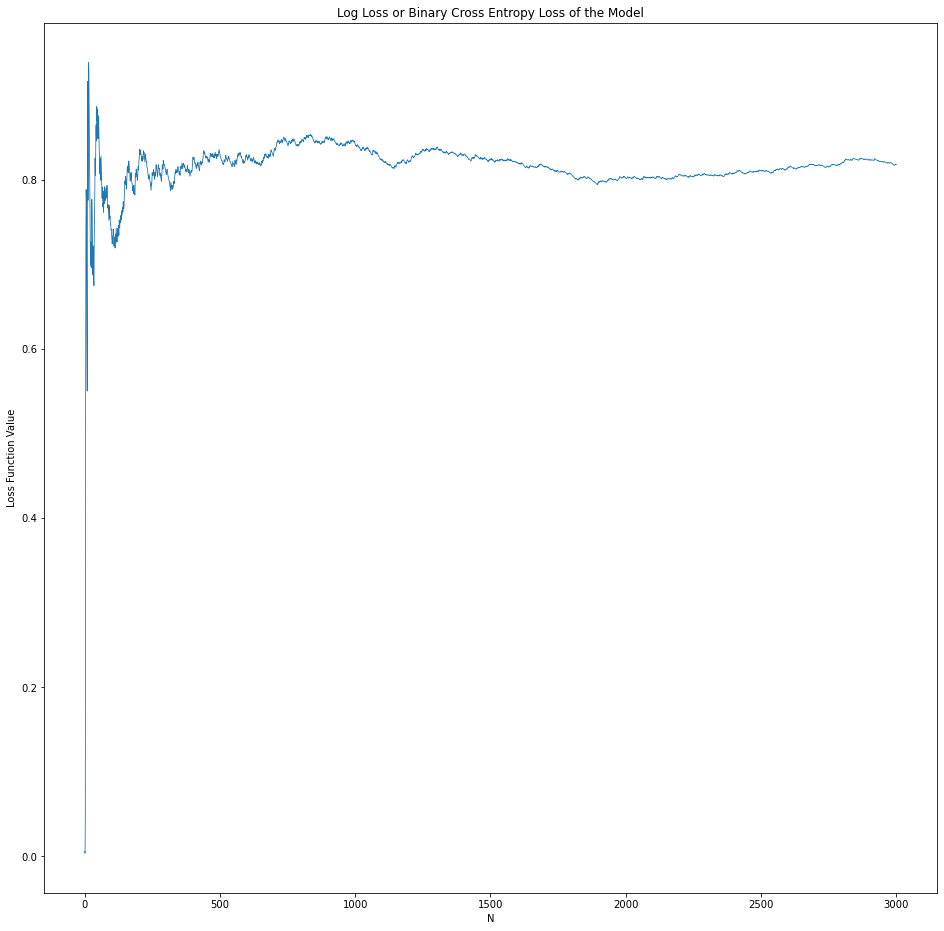

<Figure size 1152x1152 with 0 Axes>

In [11]:
import math
proba = grid_search_model.predict_proba(X_test)
log_loss = []
N = len(X_test)
s = []
actual_class = list(y_test)
for i in range(N):
    alpha = actual_class[i] * math.log(proba[i][actual_class[i]], 10)
    beta = (1 - actual_class[i]) * math.log(1 - proba[i][actual_class[i]], 10)
    s.append(alpha + beta)
    log_loss.append((-1/(i + 1)) * sum(s[0:i+1]))
plt.rcParams["figure.figsize"] = (16, 16)
plt.xlabel("N")
plt.ylabel("Loss Function Value")
plt.title("Log Loss or Binary Cross Entropy Loss of the Model")
plt.plot([i + 1 for i in range(N)], log_loss, linewidth=0.8)
plt.show()
plt.savefig("images/log_loss.png", dpi=100)

<h3>Step 8: Model saving</h3>

In [12]:
import joblib
joblib.dump(grid_search_model, "models/logistic_regression_model")
print("Model saved successfully...")

Model saved successfully...
